# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [36]:
architecture = 'fcn2'
branches = 4
shared_frac_list = [0, 0.25, 0.5, 0.75, 1]

## Ensemble

In [37]:
df = pd.read_csv('results/mnist-{}/B{}-test.csv'.format(architecture, branches))

In [38]:
df

,Unnamed: 0,acc_1,acc_2,acc_3,acc_4,after_mean_acc,before_mean_acc,model_id_1,model_id_2,model_id_3,model_id_4
0,0,0.9503,0.9339,0.9528,0.9369,0.9550,0.9556,8,2,1,7
1,0,0.9369,0.9528,0.9522,0.9339,0.9552,0.9551,7,1,4,2
2,0,0.9369,0.9528,0.9522,0.9508,0.9576,0.9569,7,1,4,3
3,0,0.9508,0.9499,0.9369,0.9479,0.9567,0.9564,3,5,7,6
4,0,0.9528,0.9522,0.9499,0.9479,0.9577,0.9574,1,4,5,6
5,0,0.9508,0.9528,0.9369,0.9522,0.9576,0.9569,3,1,7,4
6,0,0.9508,0.9528,0.9479,0.9369,0.9573,0.9571,3,1,6,7
7,0,0.9369,0.9508,0.9479,0.9522,0.9562,0.9561,7,3,6,4


In [39]:
avg_acc = df['before_mean_acc'].mean()
std_acc = df['before_mean_acc'].std()
print(avg_acc, std_acc)

0.9564374999999999 0.000792712341989748


## Baseline

In [40]:
baseline_val_acc = []
for i in range(8):
    df = pd.read_csv('results/mnist-{}/train_{}.csv'.format(architecture, i+1))
    baseline_val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(baseline_val_acc)
print(baseline)

0.946837492287159


In [41]:
print(baseline_val_acc)

[0.9527999758720398, 0.933899998664856, 0.9508000016212464, 0.9521999955177308, 0.949899971485138, 0.9478999972343444, 0.9369000196456908, 0.9502999782562256]


## Virtual Branching

In [42]:
results = {}
results_std = {}
for frac in shared_frac_list:
    val_acc = []
    for i in range(4):
        df = pd.read_csv('results/vb-mnist-{}/B{}/S{:.2f}/train_{}.csv'.format(architecture, branches, frac, i+1))
        val_acc.append(df.iloc[-1]['val_acc_ensemble'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9571999907493592, 0.9585000276565552, 0.9544000029563904, 0.9574999809265136]
0.25 [0.9512000083923341, 0.95169997215271, 0.9544000029563904, 0.9534000158309937]
0.5 [0.9509999752044678, 0.9509000182151794, 0.9513000249862672, 0.9514999985694884]
0.75 [0.9509999752044678, 0.9538999795913696, 0.9496999979019164, 0.9477000236511229]
1 [0.9516000151634216, 0.9581000208854676, 0.9412000179290771, 0.9556000232696532]


In [43]:
results

{0: 0.9569000005722046,
 0.25: 0.952674999833107,
 0.5: 0.9511750042438507,
 0.75: 0.9505749940872192,
 1: 0.9516250193119049}

## Create Figure

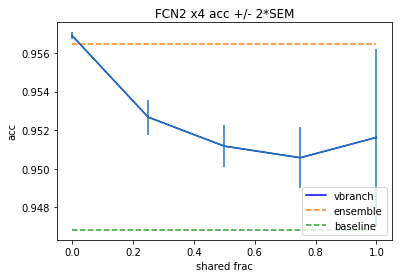

In [44]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], label='vbranch', color='blue')
trials = 8
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), label='baseline', linestyle='--')

plt.legend(loc='lower right')
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} x{} acc +/- 2*SEM'.format(architecture.upper(), branches))

if not os.path.isdir('figs'):
    os.system('mkdir figs')
    
plt.savefig('figs/{}-{}-seq-grad-results.png'.format(architecture, branches))
plt.show()

## Batch Size

In [11]:
# batch_size_list = [10, 20, 40, 80, 100, 160, 200]
# batch_size_acc = []

# for batch_size in batch_size_list:
#     arr = []
#     for i in range(8):
#         df = pd.read_csv('results/batch_size/mnist-fcn/batch_{}/train_{}.csv'.format(batch_size,i+1))
#         arr.append(df.iloc[-1]['val_acc'])
#     batch_size_acc.append([np.mean(arr), np.std(arr)])

In [12]:
# batch_size_acc = np.array(batch_size_acc)

# # plt.plot(batch_size_list, batch_size_acc[:, 0])
# trials = 8
# error = batch_size_acc[:, 1] / np.sqrt(trials)
# plt.errorbar(batch_size_list, batch_size_acc[:, 0], error*2)
# plt.title('fcn val acc vs. batch size')
# plt.xlabel('batch size')
# plt.ylabel('val acc')

# plt.savefig('figs/fcn-val-acc-batch-size.png')
# plt.show()